## **1. Import Library**

Mengimport library-library yang dibutuhkan untuk membuat model

In [1]:
import numpy as np  # operasi angka dan aljabar linear
import matplotlib.pyplot as plt  # untuk membuat grafik
import pandas as pd  # manipulasi dan analisis data
import seaborn as sns  # alat bantu visualisasi data

# Preprocessing dan evaluasi
from sklearn.preprocessing import OneHotEncoder, StandardScaler  # transformasi data kategorik dan normalisasi numerik
from sklearn.model_selection import train_test_split  # pemisahan data latih dan uji

# Model machine learning
from sklearn.ensemble import RandomForestClassifier  # model klasifikasi Random Forest
from xgboost import XGBClassifier  # model klasifikasi XGBoost
from lightgbm import LGBMClassifier  # model klasifikasi LightGBM

# Alat evaluasi performa model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix  # metrik untuk mengevaluasi hasil prediksi


## **2. Data Loading**

Load dataset dari github


In [2]:
dataset = "https://raw.githubusercontent.com/silviaazahro/Machine-Learning-Terapan/refs/heads/main/Predictive%20Analysis/healthcare-dataset-stroke-data.csv"
df = pd.read_csv(dataset)

Melihat sample dari data

In [3]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


## **3. Exploratory Data Analysis (EDA)**

### 3.1. Deskripsi Variabel

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


### 3.2. Menangani Missing Value dan Outlier

Mengecek dataset apakah terdapat missing values

In [6]:
df.isnull().sum()

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,201


Karena masih ada missing value kolom **'bmi'** jadi kita imputasi dengan Mean dan Median

In [7]:
# Imputasi dengan mean
df['bmi'].fillna(df['bmi'].mean(), inplace=True)

# Atau imputasi dengan median (jika data miring/skewed)
df['bmi'].fillna(df['bmi'].median(), inplace=True)

<ipython-input-7-a301490b0b9d>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bmi'].fillna(df['bmi'].mean(), inplace=True)
<ipython-input-7-a301490b0b9d>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

Kita cek kembali missing values

In [8]:
df.isnull().sum()

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,0


Mengecek total kategori pada fitur gender

In [9]:
print(df['gender'].value_counts())

gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64


In [10]:
gender_mode = df['gender'].mode()[0]

df['gender'] = df['gender'].replace('Other', gender_mode)

Mengecek dan menangani Outlier

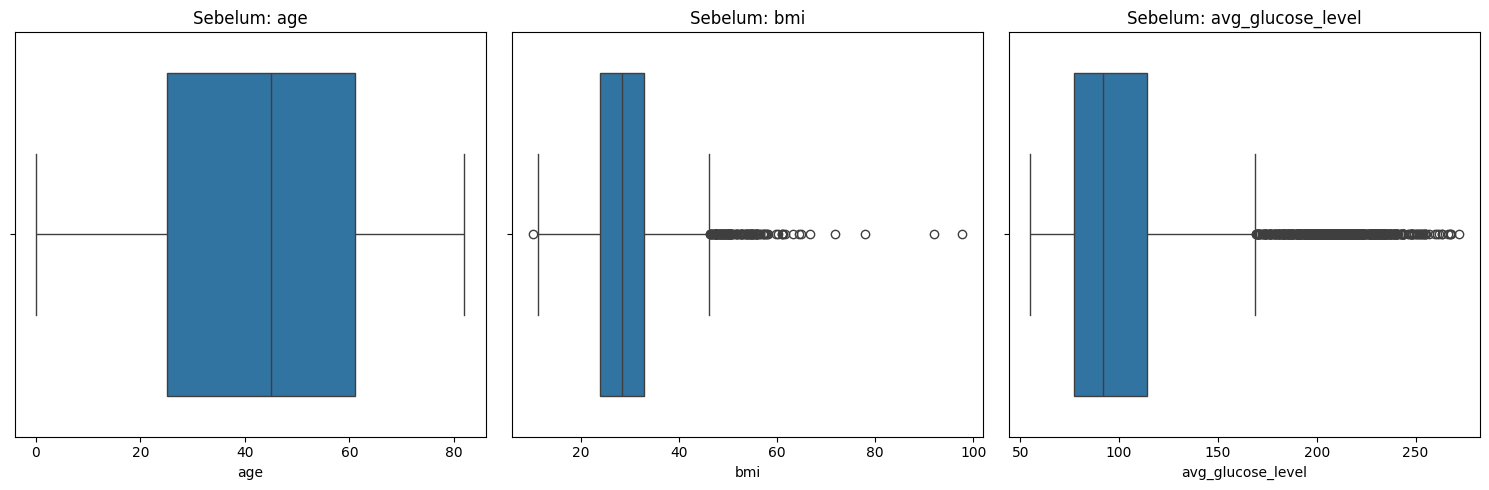


Total Outlier pada Setiap Fitur (Sebelum Clipping):
age: 0 outlier
bmi: 126 outlier
avg_glucose_level: 627 outlier


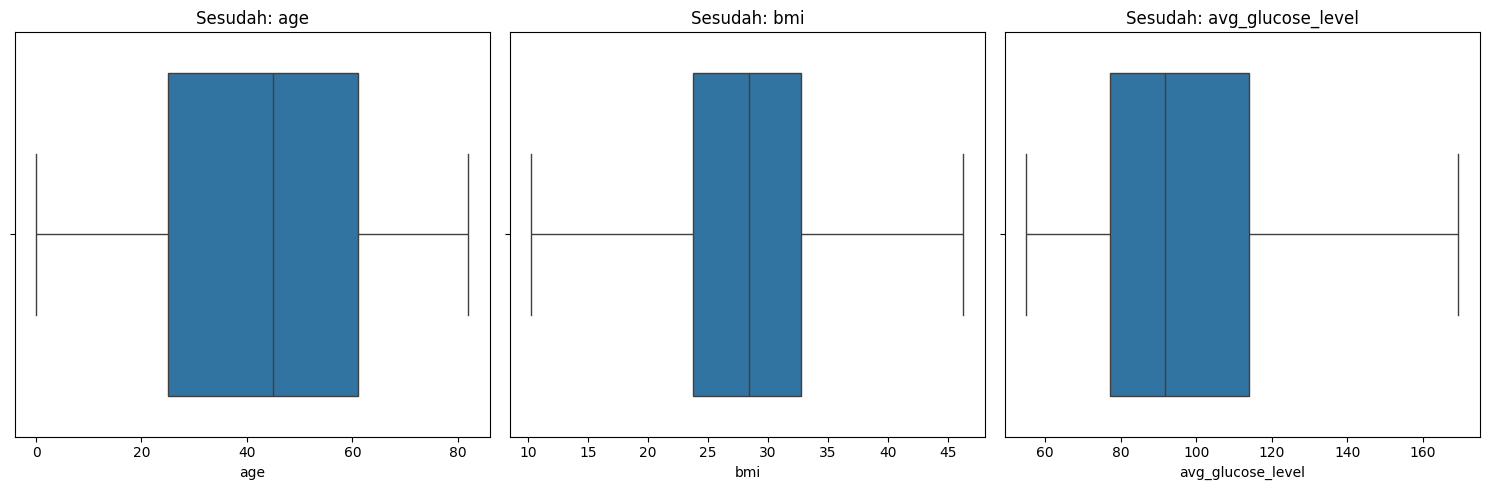

In [11]:
# Menentukan kolom numerik yang akan dianalisis
fitur_numerik = ['age', 'bmi', 'avg_glucose_level']

# Menyimpan nilai-nilai outlier untuk setiap kolom
nilai_outlier = {}

# Visualisasi boxplot sebelum penanganan outlier
fig, axes = plt.subplots(1, len(fitur_numerik), figsize=(5 * len(fitur_numerik), 5))

# Jika hanya ada satu fitur, jadikan axes dalam bentuk list
if len(fitur_numerik) == 1:
    axes = [axes]

# Membuat boxplot awal untuk setiap fitur numerik
for ax, kolom in zip(axes, fitur_numerik):
    sns.boxplot(x=df[kolom], ax=ax)
    ax.set_title(f"Sebelum: {kolom}")

plt.tight_layout()
plt.show()

# Menangani outlier dengan metode IQR
for kolom in fitur_numerik:
    kuartil_1 = np.percentile(df[kolom].dropna(), 25)
    kuartil_3 = np.percentile(df[kolom].dropna(), 75)
    rentang_iqr = kuartil_3 - kuartil_1
    batas_bawah = kuartil_1 - 1.5 * rentang_iqr
    batas_atas = kuartil_3 + 1.5 * rentang_iqr

    outlier = df[kolom][(df[kolom] < batas_bawah) | (df[kolom] > batas_atas)]
    nilai_outlier[kolom] = outlier

    # Clipping nilai di luar batas menjadi batas atas/bawah
    df[kolom] = np.clip(df[kolom], batas_bawah, batas_atas)

# Menampilkan jumlah outlier yang terdeteksi sebelum clipping
print("\nTotal Outlier pada Setiap Fitur (Sebelum Clipping):")
for kolom, outlier in nilai_outlier.items():
    print(f"{kolom}: {len(outlier)} outlier")

# Visualisasi boxplot setelah outlier ditangani
fig, axes = plt.subplots(1, len(fitur_numerik), figsize=(5 * len(fitur_numerik), 5))

if len(fitur_numerik) == 1:
    axes = [axes]

for ax, kolom in zip(axes, fitur_numerik):
    sns.boxplot(x=df[kolom], ax=ax)
    ax.set_title(f"Sesudah: {kolom}")

plt.tight_layout()
plt.show()

### 3.3. Univariate Analysis

Mengelompokan kolom ke numerik dan kategorikal.

In [12]:
# Fitur numerik (tipe data angka kontinu dan diskret)
fitur_numerik = ['age', 'bmi', 'avg_glucose_level']

# Fitur kategorik (tipe data object atau kategorikal)
fitur_kategorikal = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'stroke']

Memvisualisasi untuk melihat distibusi nilai dari semua kolom numerik.

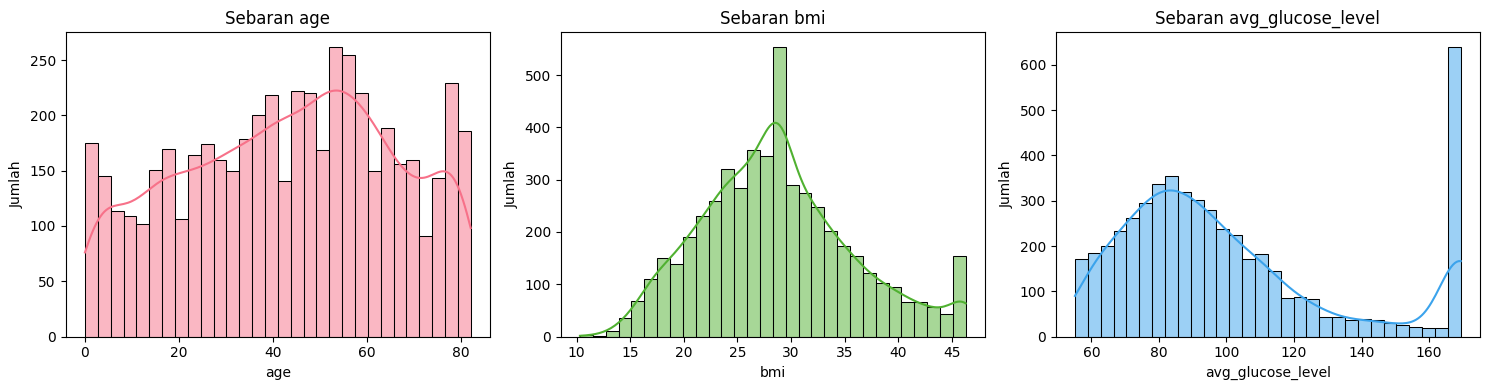

In [13]:
# Membuat figure dengan ukuran menyesuaikan jumlah fitur numerik
plt.figure(figsize=(5 * len(fitur_numerik), 4))

# Loop untuk visualisasi distribusi tiap fitur numerik
for idx, kolom in enumerate(fitur_numerik, start=1):
    plt.subplot(1, len(fitur_numerik), idx)

    # Memilih warna berdasarkan jumlah fitur
    warna = sns.color_palette("husl", len(fitur_numerik))[idx - 1]

    # Menentukan jenis plot berdasarkan jumlah nilai unik
    if df[kolom].nunique() > 10:
        sns.histplot(df[kolom].dropna(), bins=30, kde=True, color=warna)
    else:
        sns.countplot(x=df[kolom], palette="husl")

    # Memberi label dan judul
    plt.title(f"Sebaran {kolom}")
    plt.xlabel(kolom)
    plt.ylabel("Jumlah")

# Mengatur layout agar tidak saling bertumpuk
plt.tight_layout()
plt.show()

Memvisualisasi untuk melihat distibusi persebaran nilai dari masing masing kategori dari semua kolom Kategori.


Rangkuman Kategori pada 'gender':
        Jumlah Sampel  Persentase (%)
gender                               
Female           2995            58.6
Male             2115            41.4
--------------------------------------------------

Rangkuman Kategori pada 'hypertension':
              Jumlah Sampel  Persentase (%)
hypertension                               
0                      4612            90.3
1                       498             9.7
--------------------------------------------------

Rangkuman Kategori pada 'heart_disease':
               Jumlah Sampel  Persentase (%)
heart_disease                               
0                       4834            94.6
1                        276             5.4
--------------------------------------------------

Rangkuman Kategori pada 'ever_married':
              Jumlah Sampel  Persentase (%)
ever_married                               
Yes                    3353            65.6
No                     1757            34.4
----

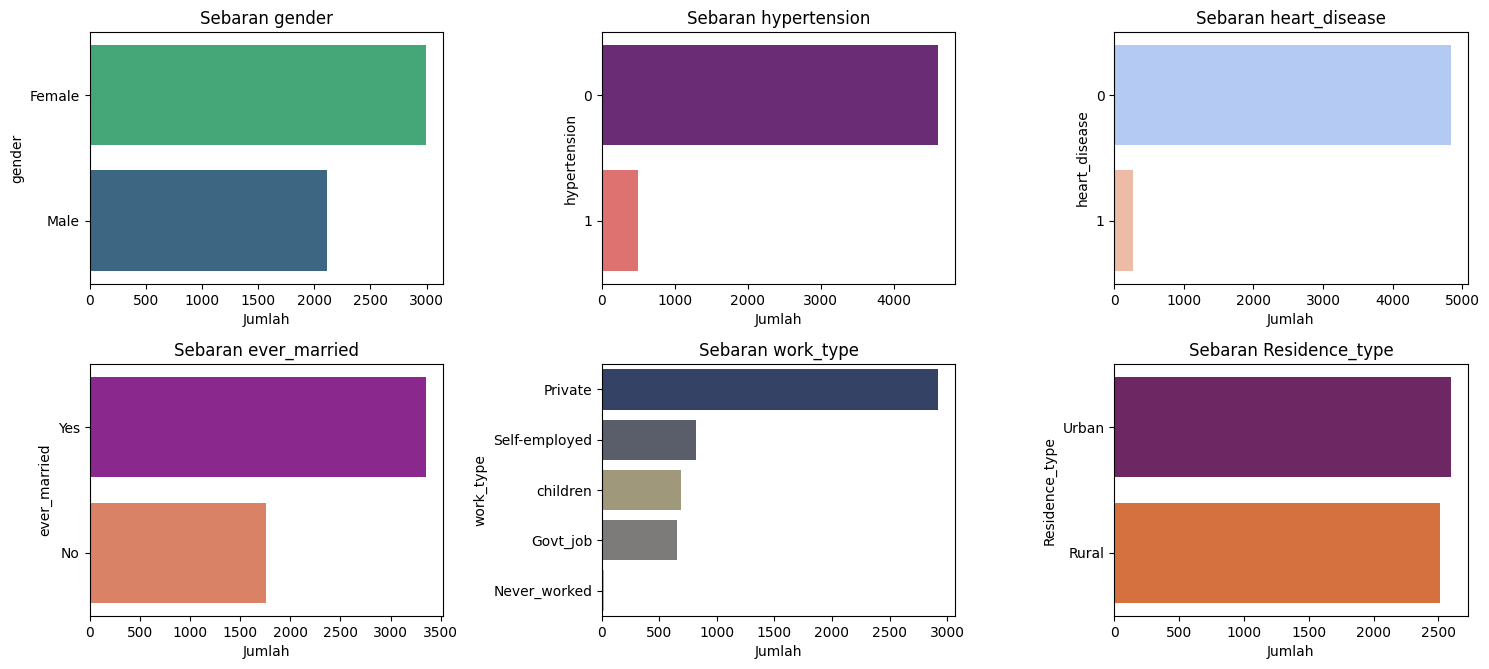

In [14]:
# Menentukan ukuran figure untuk seluruh plot
plt.figure(figsize=(15, 13))

# Daftar palet warna yang digunakan untuk tiap plot
daftar_palettes = ["viridis", "magma", "coolwarm", "plasma", "cividis", "inferno"]

# Menampilkan jumlah dan persentase setiap kategori pada fitur kategorikal
for fitur in fitur_kategorikal:
    jumlah = df[fitur].value_counts()
    persentase = 100 * df[fitur].value_counts(normalize=True)

    distribusi_df = pd.DataFrame({
        'Jumlah Sampel': jumlah,
        'Persentase (%)': persentase.round(1)
    })

    print(f"\nRangkuman Kategori pada '{fitur}':")
    print(distribusi_df)
    print("-" * 50)

# Membuat visualisasi distribusi kategori menggunakan countplot
for idx, (fitur, palet) in enumerate(zip(fitur_kategorikal, daftar_palettes), start=1):
    plt.subplot(4, 3, idx)
    sns.countplot(
        y=df[fitur],
        order=df[fitur].value_counts().index,
        hue=df[fitur],
        palette=palet,
        legend=False
    )
    plt.title(f"Sebaran {fitur}")
    plt.xlabel("Jumlah")
    plt.ylabel(fitur)

# Mengatur layout agar plot tidak saling bertumpukan
plt.tight_layout()
plt.show()


### 3.4. Multivariate Analysis

Melihat rata rata stroke vs fitur lain dalam dataset

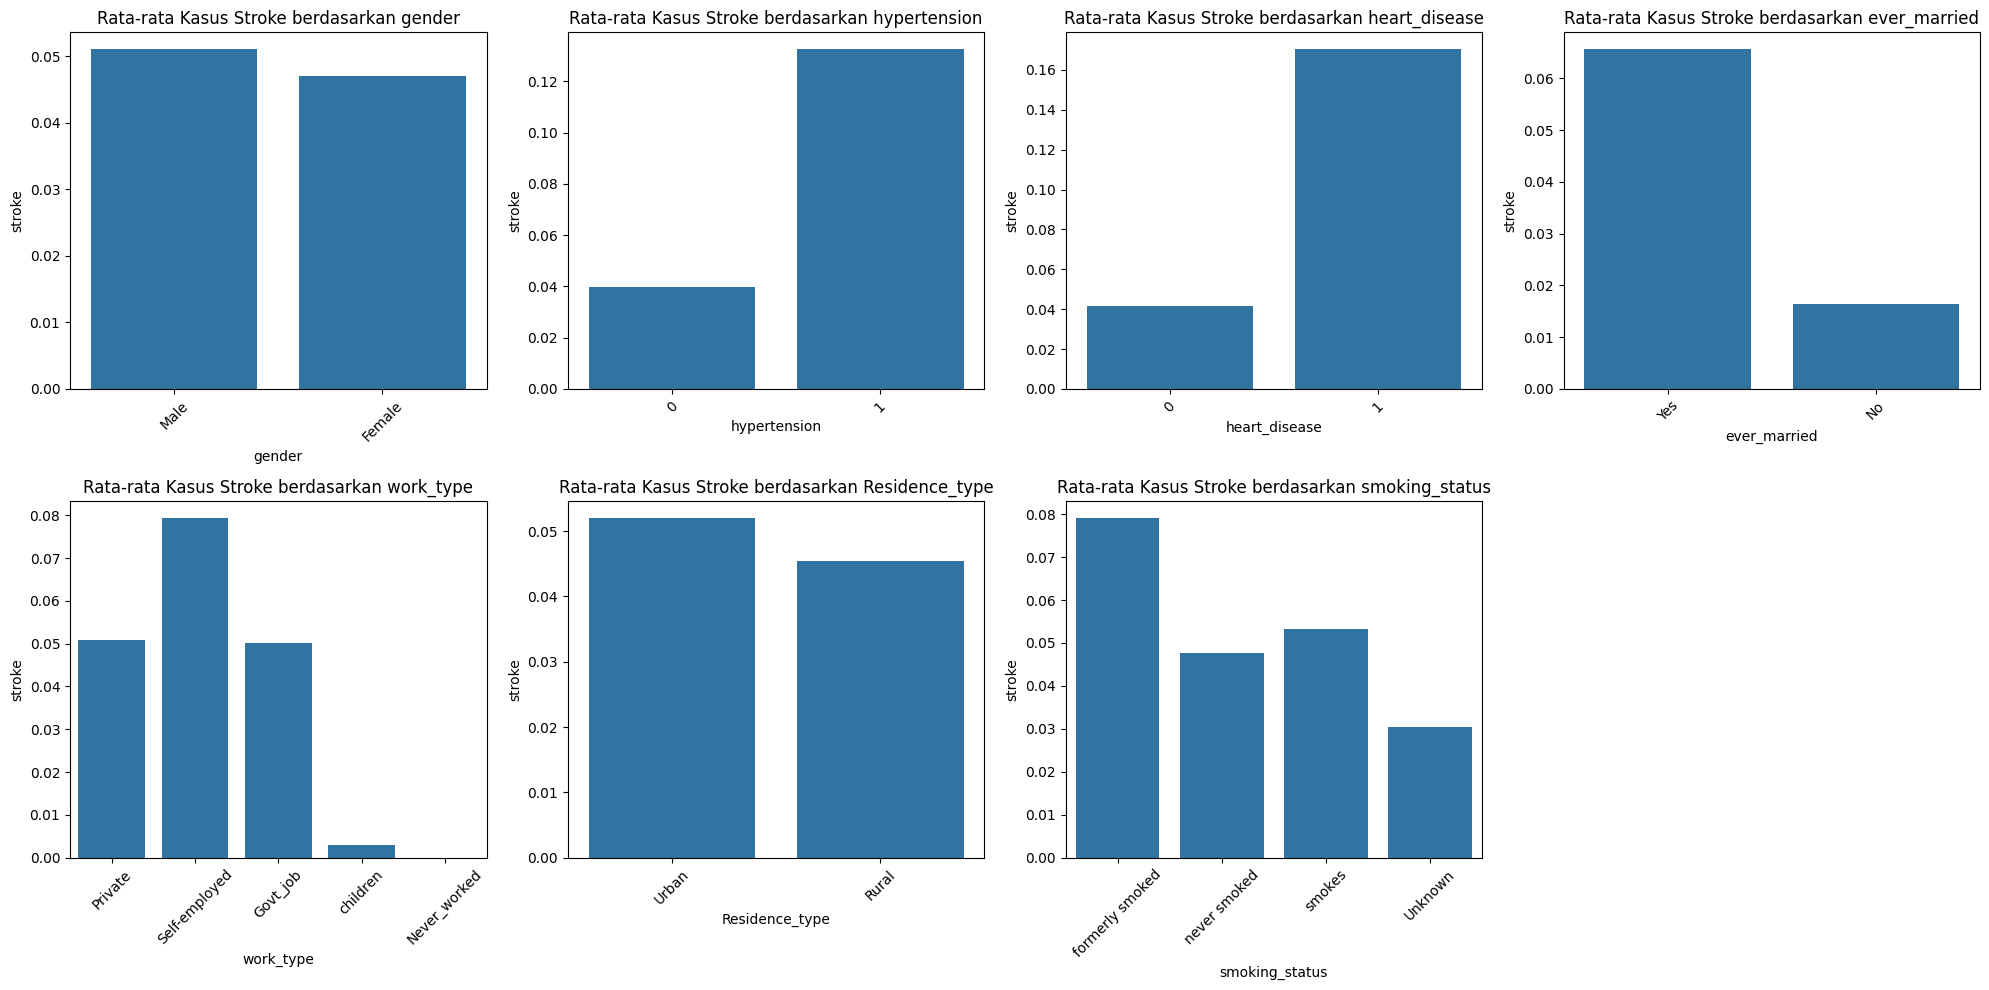

In [15]:
# Daftar fitur bertipe kategorikal
fitur_kategorikal = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

# Menyusun subplot dalam grid 2 baris x 4 kolom untuk tampilan yang lebih rapi
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()  # Ubah array 2D menjadi 1D agar mudah diakses per indeks

# Membuat barplot untuk masing-masing fitur kategorikal terhadap rata-rata stroke
for idx, fitur in enumerate(fitur_kategorikal):
    sns.barplot(
        x=fitur,
        y='stroke',
        data=df,
        ax=axes[idx],
        estimator=lambda val: sum(val) / len(val),
        errorbar=None
    )
    axes[idx].set_title(f"Rata-rata Kasus Stroke berdasarkan {fitur}")
    axes[idx].tick_params(axis='x', rotation=45)  # Memiringkan label sumbu-x agar tidak bertumpuk

# Menghapus subplot yang tidak terpakai jika jumlah fitur lebih sedikit dari jumlah subplot
for k in range(len(fitur_kategorikal), len(axes)):
    fig.delaxes(axes[k])

# Menyesuaikan layout agar visualisasi tidak saling menimpa
plt.tight_layout()
plt.show()

Memvisualisasikan hubungan antar variabel dalam dataset.

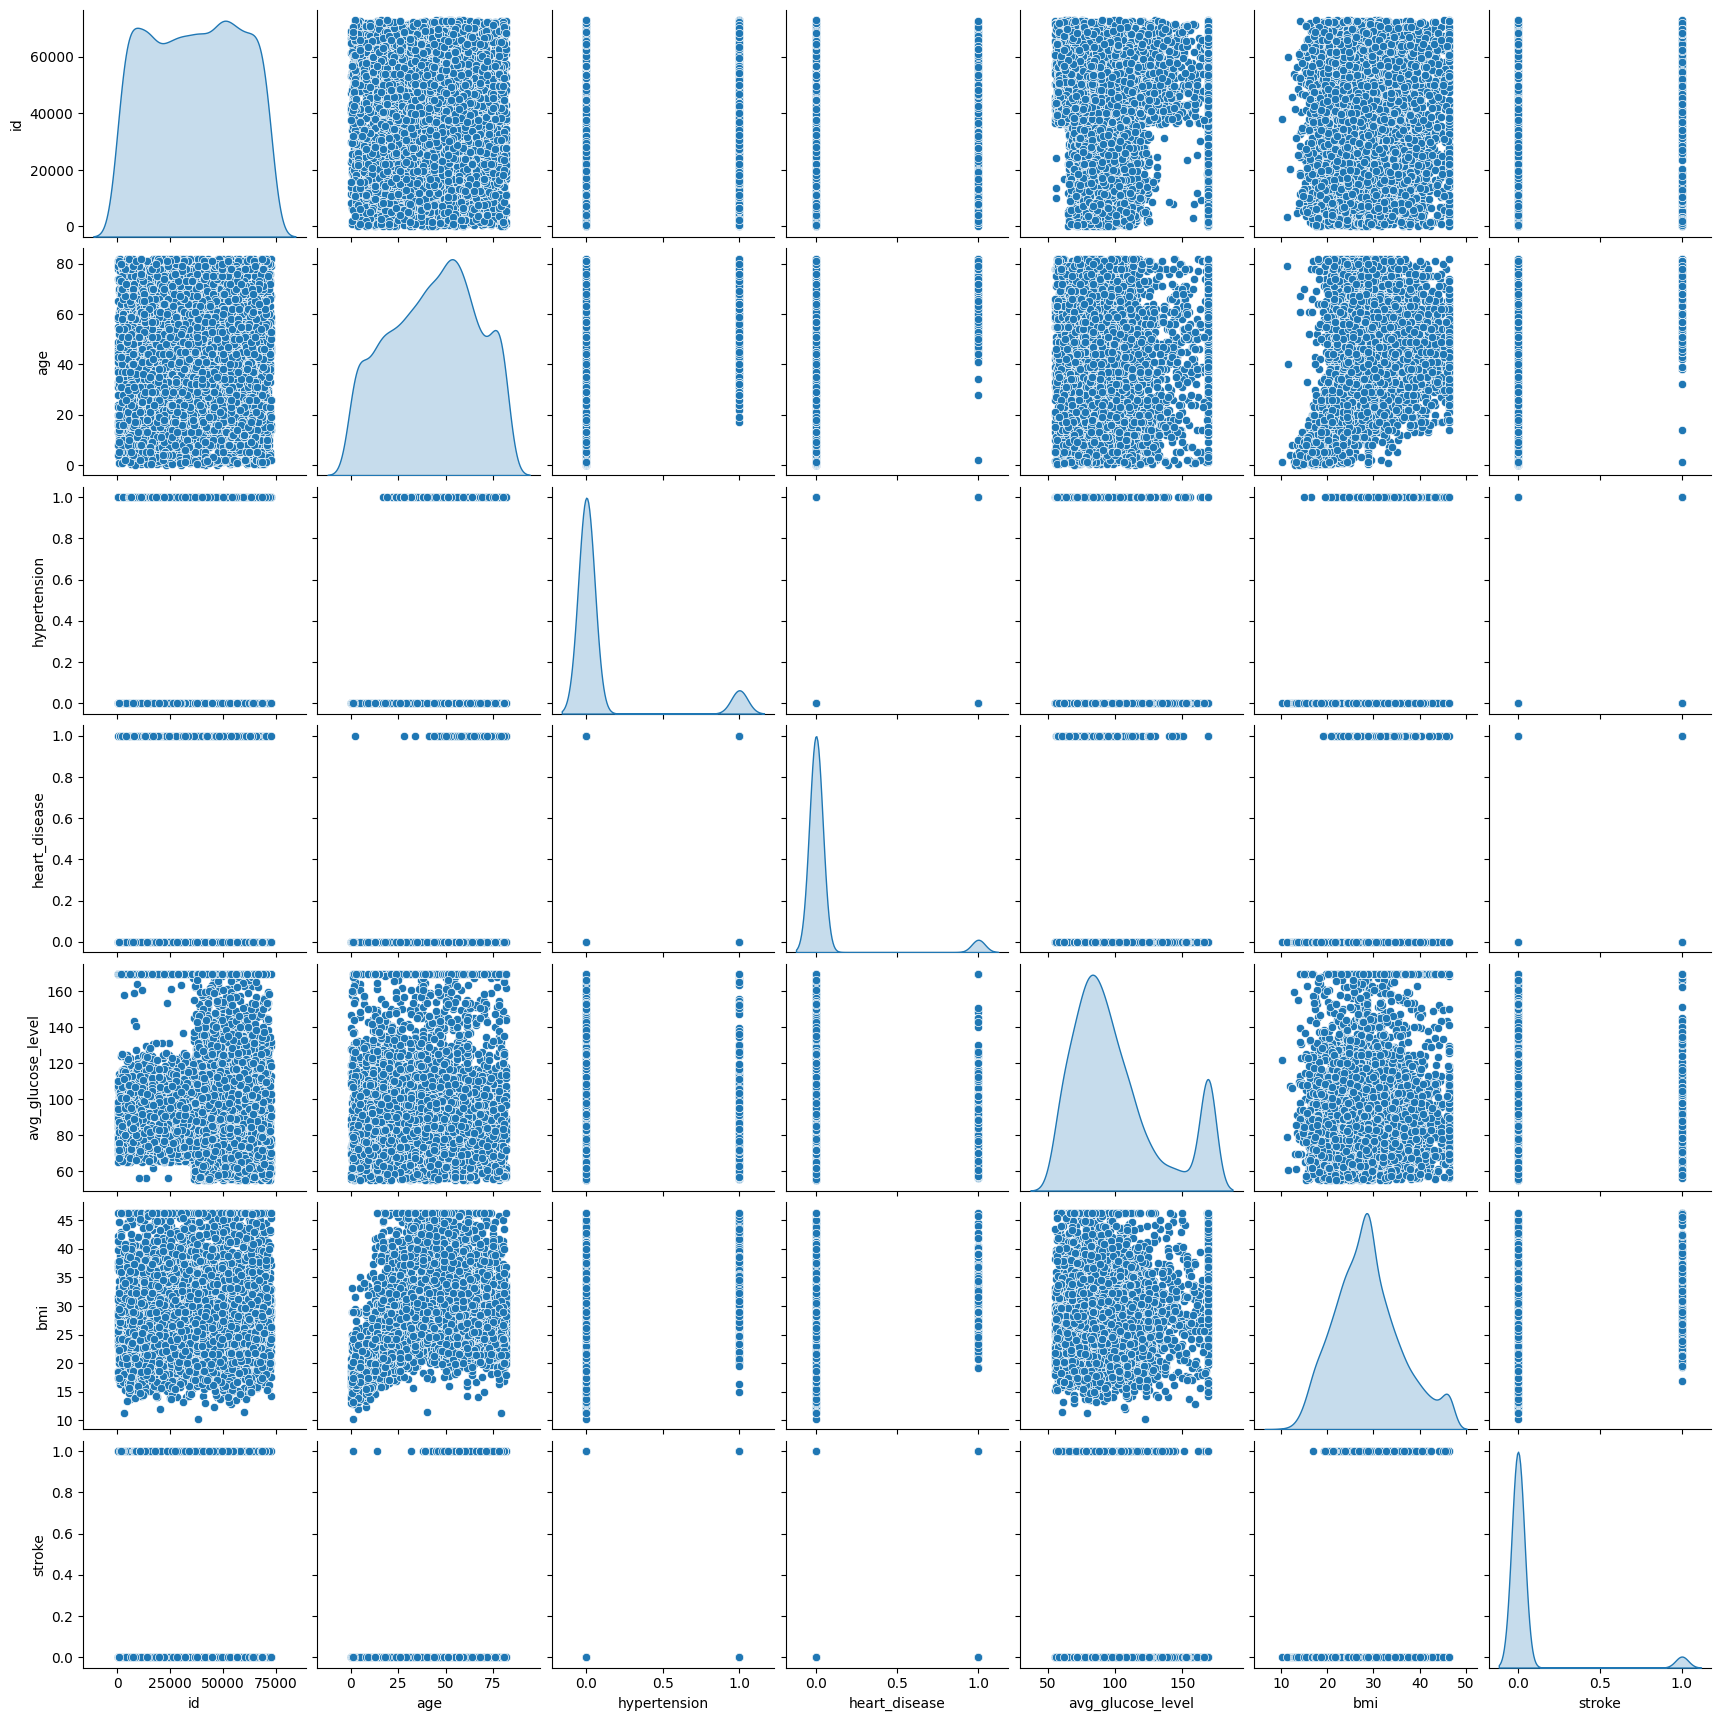

In [16]:
sns.pairplot(df, diag_kind = 'kde')

Visualisasi correlation matrix untuk melihat korelasi atau hubungan fitur-fitur yang ada terhadap target atau label (stroke).

Text(0.5, 1.0, 'Matriks Korelasi antar Fitur Numerik')

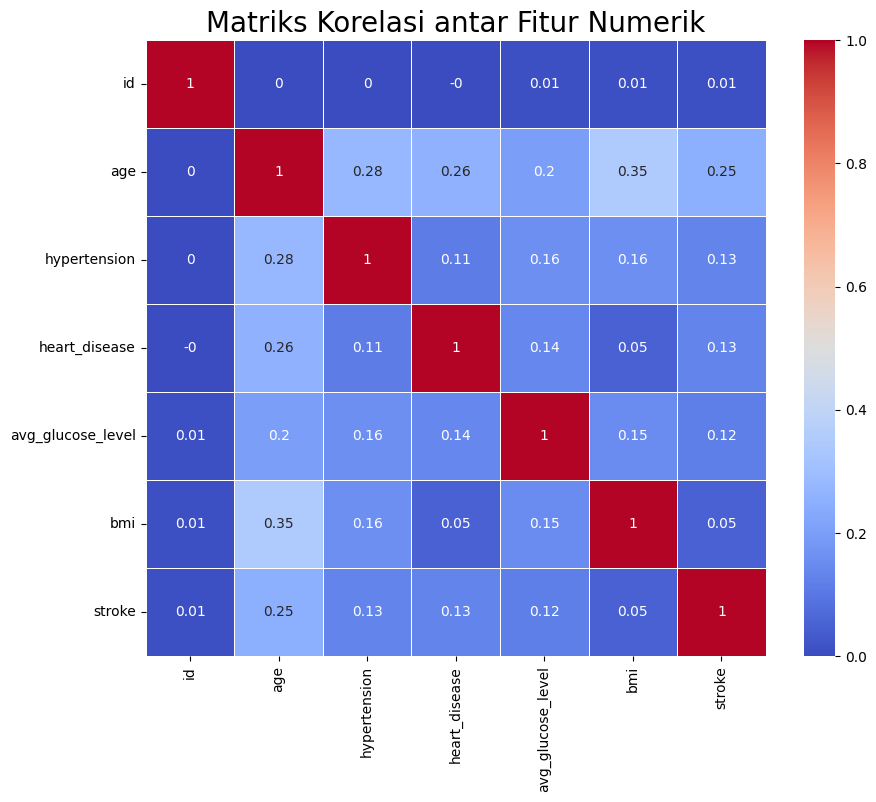

In [17]:
# Mengambil nama-nama kolom dengan tipe data numerik
fitur_numerik = df.select_dtypes(include=['number']).columns

# Membuat figure dengan ukuran tertentu
plt.figure(figsize=(10, 8))

# Menghitung korelasi antar fitur numerik dan membulatkan hingga dua desimal
matriks_korelasi = df[fitur_numerik].corr().round(2)

# Visualisasi korelasi dalam bentuk heatmap
sns.heatmap(
    data=matriks_korelasi,
    annot=True,
    cmap='coolwarm',
    linewidths=0.5
)
plt.title("Matriks Korelasi antar Fitur Numerik", fontsize=20)

## **4. Data Preparation**

### 4.1. Encoding Fitur Kategori

Mengencoding fitur kategori (gender dan smoking_status) ke fitur numerik menggunakan OneHotEncoder.

In [18]:
# Menentukan kolom-kolom kategorikal yang akan dikonversi
fitur_kategorikal = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

# Inisialisasi encoder dengan pengaturan untuk mengabaikan kategori yang tidak dikenal
ohe = OneHotEncoder(handle_unknown="ignore", sparse_output=False)

# Melakukan transformasi one-hot encoding
hasil_encoding = ohe.fit_transform(df[fitur_kategorikal])

# Membuat DataFrame baru dari hasil encoding
df_encoded = pd.DataFrame(
    hasil_encoding,
    columns=ohe.get_feature_names_out(fitur_kategorikal),
    index=df.index
)

# Menghapus kolom aslinya dan menggantinya dengan versi yang sudah diencoding
df.drop(columns=fitur_kategorikal, inplace=True)
df = pd.concat([df, df_encoded], axis=1)

Mengecek hasil dari OneHotEncoder yang membuat fitur baru dari hasil encoding.

In [19]:
df.head()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,ever_married_No,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,67.0,0,1,169.3575,36.600000,1,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,51676,61.0,0,0,169.3575,28.893237,1,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,31112,80.0,0,1,105.9200,32.500000,1,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,60182,49.0,0,0,169.3575,34.400000,1,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,1665,79.0,1,0,169.3575,24.000000,1,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


### 4.2. Standarisasi Fitur

Melakukan standarisasi atau normalisasi fitur numerik yang rentangnya beragam seperti kolom 'age', 'bmi', dan 'avg_glucose_level' menggunakan StandardScaler untuk menyamakan rentang nilai.

In [20]:
# Daftar fitur numerik yang akan dinormalisasi
fitur_numerik = ['age', 'bmi', 'avg_glucose_level']

# Inisialisasi objek StandardScaler
standarisasi = StandardScaler()

# Menerapkan standardisasi ke kolom-kolom numerik
df[fitur_numerik] = standarisasi.fit_transform(df[fitur_numerik])

Melihat hasil perubahan dari nilai pada fitur numerik yang ditentukan sebelumnya.

In [21]:
df.head()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,ever_married_No,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,1.051434,0,1,2.058363,1.106633,1,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,51676,0.786070,0,0,2.058363,0.024107,1,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,31112,1.626390,0,1,0.148256,0.530729,1,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,60182,0.255342,0,0,2.058363,0.797611,1,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,1665,1.582163,1,0,2.058363,-0.663218,1,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


### 4.3. Train-Test-Split

In [22]:
# Memisahkan fitur dan target
fitur = df.drop(columns=["stroke"])
target = df["stroke"]

# Membagi dataset menjadi data pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(
    fitur,
    target,
    test_size=0.3,
    random_state=123
)

# Menampilkan dimensi masing-masing subset data
print(f"Ukuran X_train: {X_train.shape}")
print(f"Ukuran y_train: {y_train.shape}")
print(f"Ukuran X_test: {X_test.shape}")
print(f"Ukuran y_test: {y_test.shape}")

Ukuran X_train: (3577, 21)
Ukuran y_train: (3577,)
Ukuran X_test: (1533, 21)
Ukuran y_test: (1533,)


## **5. Model Development**

### 5.1. Random Forest

Load model Random Forest dan melatihnya dengan data train.

In [23]:
# Inisialisasi model Random Forest dengan 100 pohon dan nilai random state untuk reprodusibilitas
rf_model = RandomForestClassifier(n_estimators=100, random_state=123)

# Melatih model menggunakan data pelatihan
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=123)

### 5.2. XGBoost

Load model XGBoost dan melatihnya dengan data train.

In [24]:
# Inisialisasi model XGBoost dengan pengaturan evaluasi logloss dan random state untuk hasil yang konsisten
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=123)

# Melatih model XGBoost pada data pelatihan
xgb_model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:34:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=123, ...)

### 5.3 LightGBM

Load model LightGBM dan melatihnya dengan data train.

In [25]:
# Membuat instance model LightGBM dengan parameter random state untuk hasil yang konsisten
lgbm_model = LGBMClassifier(random_state=123)

# Melatih model LightGBM menggunakan data pelatihan
lgbm_model.fit(X_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 181, number of negative: 3396
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000259 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 897
[LightGBM] [Info] Number of data points in the train set: 3577, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.050601 -> initscore=-2.931857
[LightGBM] [Info] Start training from score -2.931857


LGBMClassifier(random_state=123)

## **6. Evaluasi Model**

### 6.1. Random Forest

Evaluasi metrik accuracy_score dan classification_report (precision, recall dan f1-score) pada model Random Forest.


Model yang digunakan: Random Forest
Akurasi pada data uji: 0.9550

--- Laporan Klasifikasi untuk Random Forest ---
               precision    recall  f1-score   support

           0       0.96      1.00      0.98      1465
           1       0.33      0.01      0.03        68

    accuracy                           0.95      1533
   macro avg       0.64      0.51      0.50      1533
weighted avg       0.93      0.95      0.93      1533

Confusion Matrix untuk Random Forest:
[[1463    2]
 [  67    1]]


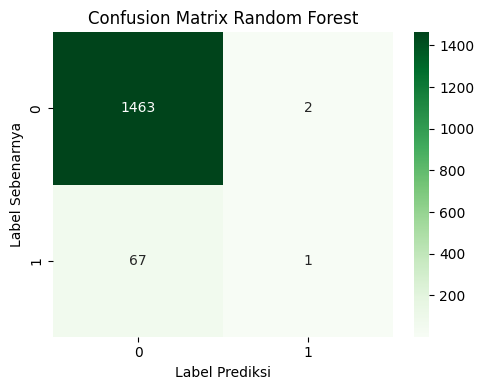

In [26]:
# Melakukan prediksi menggunakan model Random Forest pada data uji
y_pred_test = rf_model.predict(X_test)

# Menghitung akurasi pada data uji
akurasi_test = accuracy_score(y_test, y_pred_test)

print(f"\nModel yang digunakan: Random Forest")
print(f"Akurasi pada data uji: {akurasi_test:.4f}")

print("\n--- Laporan Klasifikasi untuk Random Forest ---\n", classification_report(y_test, y_pred_test))

# Membuat confusion matrix
cm_test = confusion_matrix(y_test, y_pred_test)

print("Confusion Matrix untuk Random Forest:")
print(cm_test)

# Visualisasi confusion matrix dengan heatmap
fig, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Greens', ax=ax)
ax.set_title("Confusion Matrix Random Forest")
ax.set_xlabel("Label Prediksi")
ax.set_ylabel("Label Sebenarnya")

plt.tight_layout()
plt.show()

### 6.2. XGBoost

Evaluasi metrik accuracy_score dan classification_report (precision, recall dan f1-score) pada model XGBoost.


Model yang digunakan: XGBoost
Akurasi pada data uji: 0.9472

--- Laporan Klasifikasi untuk XGBoost ---
               precision    recall  f1-score   support

           0       0.96      0.99      0.97      1465
           1       0.28      0.12      0.16        68

    accuracy                           0.95      1533
   macro avg       0.62      0.55      0.57      1533
weighted avg       0.93      0.95      0.94      1533

Confusion Matrix untuk XGBoost:
[[1444   21]
 [  60    8]]


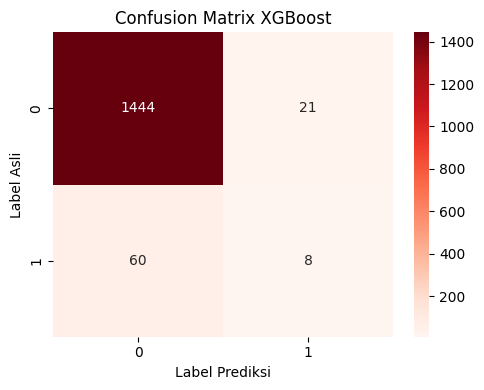

In [27]:
# Prediksi label pada data uji menggunakan model XGBoost
y_pred_test = xgb_model.predict(X_test)

# Menghitung akurasi dari prediksi
akurasi_test = accuracy_score(y_test, y_pred_test)

print(f"\nModel yang digunakan: XGBoost")
print(f"Akurasi pada data uji: {akurasi_test:.4f}")

print("\n--- Laporan Klasifikasi untuk XGBoost ---\n", classification_report(y_test, y_pred_test))

# Membuat confusion matrix
cm_test = confusion_matrix(y_test, y_pred_test)

print("Confusion Matrix untuk XGBoost:")
print(cm_test)

# Visualisasi confusion matrix menggunakan heatmap dengan palet warna merah
fig, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Reds', ax=ax)
ax.set_title("Confusion Matrix XGBoost")
ax.set_xlabel("Label Prediksi")
ax.set_ylabel("Label Asli")

plt.tight_layout()
plt.show()

### 6.3. LightGBM

Evaluasi metrik accuracy_score dan classification_report (precision, recall dan f1-score) pada model LightGBM.


Model yang digunakan: LightGBM
Akurasi pada data uji: 0.9511

--- Laporan Klasifikasi LightGBM ---
               precision    recall  f1-score   support

           0       0.96      0.99      0.97      1465
           1       0.27      0.06      0.10        68

    accuracy                           0.95      1533
   macro avg       0.61      0.53      0.54      1533
weighted avg       0.93      0.95      0.94      1533

Confusion Matrix untuk LightGBM:
[[1454   11]
 [  64    4]]


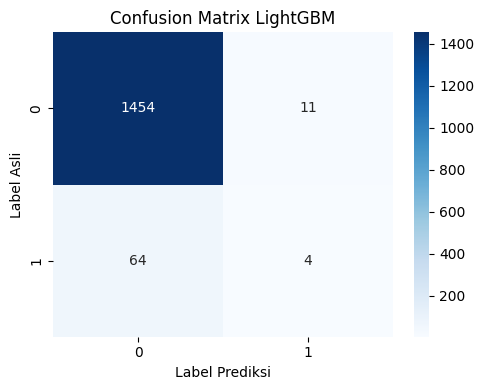

In [28]:
# Melakukan prediksi pada data test menggunakan model LightGBM
y_pred_test = lgbm_model.predict(X_test)

# Menghitung akurasi prediksi
akurasi_test = accuracy_score(y_test, y_pred_test)

print(f"\nModel yang digunakan: LightGBM")
print(f"Akurasi pada data uji: {akurasi_test:.4f}")

print("\n--- Laporan Klasifikasi LightGBM ---\n", classification_report(y_test, y_pred_test))

# Membuat confusion matrix
cm_test = confusion_matrix(y_test, y_pred_test)

print("Confusion Matrix untuk LightGBM:")
print(cm_test)

# Menampilkan heatmap confusion matrix dengan palet warna biru
fig, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', ax=ax)
ax.set_title("Confusion Matrix LightGBM")
ax.set_xlabel("Label Prediksi")
ax.set_ylabel("Label Asli")

plt.tight_layout()
plt.show()